In [ ]:
# Access the data
import os
import requests

URL_PREFIX = 'https://tb-hackathon-readonly.s3.us-west-2.amazonaws.com/'

FILES = ["eth.usd.2020"] #, "xbt.usd.2020", "xbt.usd.2018", "eth.usd.2018"]

for name in FILES:
    url = URL_PREFIX + name
    response = requests.get(url)
    with open(name + '.csv', 'wb') as f:
        f.write(response.content)

In [88]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
import math
import matplotlib.pyplot as plt

In [95]:
nrows=None
df = pd.read_csv("D:\My_Study\\University\\Uconn\MSBAPM Virtual Crypto Hackathon 2022\coderepo\eth.usd.2018.csv",nrows=nrows,names=['pair','price','amount','time_stamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96620393 entries, 0 to 96620392
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   pair        object 
 1   price       float64
 2   amount      float64
 3   time_stamp  float64
dtypes: float64(3), object(1)
memory usage: 2.9+ GB


In [29]:
df.head()

,pair,price,amount,time_stamp
0,iehx-eth-usd,742.015308,0.296652,1.514765e+09
1,iehx-eth-usd,742.272462,0.000000,1.514765e+09
2,vehx-eth-usd,742.037945,0.000000,1.514765e+09
3,bfnx-eth-usd,736.500000,1.862383,1.514765e+09
4,stmp-eth-usd,743.500000,10.000000,1.514765e+09


In [24]:
df.pair.value_counts()

iehx-eth-usd    12270
base-eth-usd     6580
bfnx-eth-usd     5559
vehx-eth-usd     2358
krkn-eth-usd     1372
gmni-eth-usd     1091
stmp-eth-usd      770
Name: pair, dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96620393 entries, 0 to 96620392
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   pair        object        
 1   price       float64       
 2   amount      float64       
 3   time_stamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.9+ GB


In [97]:
# reset datetime format
df['time_stamp'] = df['time_stamp'].apply(datetime.fromtimestamp)
df.info()

TypeError: an integer is required (got type Timestamp)

In [100]:
df.sort_values(by=['time_stamp'],inplace=True)
df.head()

,pair,price,amount,time_stamp
1,iehx-eth-usd,742.272462,0.000,2017-12-31 19:00:00
5,iehx-eth-usd,742.340138,0.000,2017-12-31 19:00:01
4,stmp-eth-usd,743.500000,10.000,2017-12-31 19:00:01
22,iehx-eth-usd,742.458327,0.000,2017-12-31 19:00:02
15,gmni-eth-usd,739.470000,0.001,2017-12-31 19:00:02


In [39]:
df.describe()

,price,amount
count,30000.000000,30000.000000
mean,731.525372,1.159317
std,5.080026,4.952772
min,717.940000,0.000000
25%,727.873590,0.000000
50%,730.600000,0.022662
75%,735.568896,0.647243
max,746.000000,171.349783


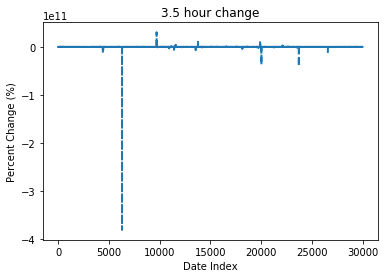

In [48]:
df['PctChange'] = df['price'].diff().pct_change()
plt.plot(df['PctChange'], '--', linewidth=2)
plt.title('3.5 hour change')
plt.xlabel('Date Index')
plt.ylabel('Percent Change (%)')
plt.show()

In [32]:
N = 18 # 计算最新斜率 slope，拟合度 r2 参考最近 N 天
M = 600 # 计算最新标准分 zscore，rsrs_score 参考最近 M 天
score_threshold = 0.7 # rsrs 标准分指标阈值
# ma 择时参数
mean_day = 20 # 计算结束 ma 收盘价，参考最近 mean_day
mean_diff_day = 3 # 计算初始 ma 收盘价，参考(mean_day + mean_diff_day)天前，窗口为 mean_diff_day 的一段时间

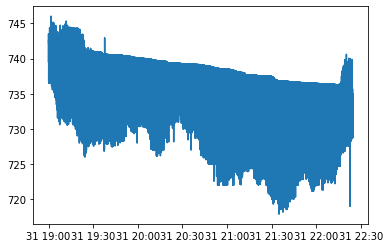

In [37]:
plt.plot(df['time_stamp'],df['price'])
plt.show()

## 重新设置index，只留下时间和价格

In [101]:
history_price = pd.DataFrame(df.groupby(['time_stamp']).price.mean())
history_price.head()

,price
time_stamp,
2017-12-31 19:00:00.000,742.272462
2017-12-31 19:00:01.000,742.920069
2017-12-31 19:00:02.000,740.964164
2017-12-31 19:00:02.379,741.240000
2017-12-31 19:00:03.000,742.663955


In [61]:
# 选择聚合的时间跨度
time_span = '10T'

In [122]:
start = df['time_stamp'].iloc[0].strftime('%Y-%m-%d %H:%M:%S')
end = df['time_stamp'].iloc[-1].strftime('%Y-%m-%d %H:%M:%S')
index = pd.date_range(start, end, freq=time_span)

In [123]:
get_price = pd.DataFrame(index = index)
get_price['mean_price'] = history_price.resample(time_span).mean()
get_price['min_price'] = history_price.resample(time_span).min()
get_price['max_price'] = history_price.resample(time_span).max()
get_price.head()

,mean_price,min_price,max_price
2017-12-31 19:00:00,739.337923,732.264535,746.00
2017-12-31 19:10:00,737.486161,729.949027,745.32
2017-12-31 19:20:00,736.453282,727.042308,744.16
2017-12-31 19:30:00,735.683226,728.656970,742.94
2017-12-31 19:40:00,734.582817,728.689437,739.08


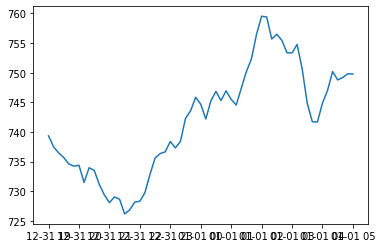

In [94]:
plt.plot(get_price['mean_price'])
plt.show()

In [124]:
get_price.shape

(52560, 3)

In [125]:
# export the data
get_price.to_csv("D:\My_Study\\University\\Uconn\MSBAPM Virtual Crypto Hackathon 2022\coderepo\eth_2018_price.csv")

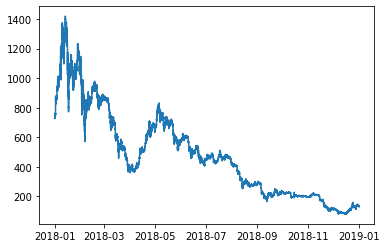

In [126]:
plt.plot(get_price['mean_price'])
plt.show()

# Getting started here